# Opioids Project: Analysis

Ra'Kira Nelson and Alexa Fahrer

In [252]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

In [253]:
opioids = pd.read_csv("data/opioids_clean.csv")
opioids = opioids.copy()
opioids = opioids.drop(columns=["Unnamed: 0"])
opioids

,fips,buyer_county,County,county,state,buyer_state,year,calc_base_wt_in_gm,deaths,population,policy_state,post,prescriptions_per_1000,overdose_per_100k,relative_year
0,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2006,399232.868993,55.0,655893.0,0,0,608.685973,8.385514,-4
1,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2007,420555.537846,67.0,655163.0,0,0,641.909781,10.226463,-3
2,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2008,440411.156173,63.0,656510.0,0,0,670.836935,9.596198,-2
3,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2009,454896.396006,80.0,658441.0,0,0,690.868880,12.149912,-1
4,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2010,486677.671546,53.0,658230.0,0,1,739.373276,8.051897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,55133,WAUKESHA,"Waukesha County, WI",WAUKESHA COUNTY,WISCONSIN,WI,2015,200375.123762,34.0,396377.0,0,1,505.516525,8.577692,5
2620,55133,WAUKESHA,NaN,NaN,NaN,WI,2016,192636.391662,NaN,NaN,0,1,NaN,NaN,6
2621,55133,WAUKESHA,NaN,NaN,NaN,WI,2017,154116.663589,NaN,NaN,0,1,NaN,NaN,7
2622,55133,WAUKESHA,NaN,NaN,NaN,WI,2018,126187.189934,NaN,NaN,0,1,NaN,NaN,8


## Control States

> ### NOTE:
> Based off the analysis found in `opioid_project_analysis.ipynb`, ['MICHIGAN', 'PENNSYLVANIA', 'TENNESSEE'] may be reasonable control states to explore average population size, overdose trends, and prescription shipment trends before 2010. However, these three states together don't seem to do well in the plots below.
>
> There's also the top 10 states that have similar:
> -  **overdose trend as pre 2010 Florida:** ['UTAH', 'MARYLAND', 'IOWA', 'NEBRASKA', 'PENNSYLVANIA', 'COLORADO', 'CALIFORNIA', 'SOUTH CAROLINA', 'MICHIGAN', 'TENNESSEE']
> - **prescription shipment trend as pre 2010 Florida:** ['DELAWARE', 'NEW MEXICO', 'OKLAHOMA', 'MICHIGAN', 'PENNSYLVANIA', 'OREGON', 'TENNESSEE', 'NEVADA', 'KENTUCKY', 'OHIO']
>
> *notice ['MICHIGAN', 'PENNSYLVANIA', 'TENNESSEE'] in the intersection*


In [254]:
"""
right now, using 2 different sets of control states for prescription shipments and overdose
"""

# control_states = ["KENTUCKY", "ALABAMA", "TENNESSEE"]
control_states_pres = [
    "DELAWARE",
    "NEW MEXICO",
]
opioids_states_pres = opioids[opioids["state"].isin(control_states_pres + ["FLORIDA"])]

control_states_od = [
    "COLORADO",
    "MICHIGAN",
    "NEVADA",
]

opioids_states_od = opioids[opioids["state"].isin(control_states_od + ["FLORIDA"])]

opioids_states_pres

,fips,buyer_county,County,county,state,buyer_state,year,calc_base_wt_in_gm,deaths,population,policy_state,post,prescriptions_per_1000,overdose_per_100k,relative_year
504,10003,NEW CASTLE,"New Castle County, DE",NEW CASTLE COUNTY,DELAWARE,DE,2006,263522.154161,41.0,527174.0,0,0,499.876993,7.777318,-4
505,10003,NEW CASTLE,"New Castle County, DE",NEW CASTLE COUNTY,DELAWARE,DE,2007,286253.968294,50.0,530555.0,0,0,539.536840,9.424094,-3
506,10003,NEW CASTLE,"New Castle County, DE",NEW CASTLE COUNTY,DELAWARE,DE,2008,341661.356781,67.0,533958.0,0,0,639.865601,12.547803,-2
507,10003,NEW CASTLE,"New Castle County, DE",NEW CASTLE COUNTY,DELAWARE,DE,2009,375969.055659,60.0,536898.0,0,0,700.261606,11.175307,-1
508,10003,NEW CASTLE,"New Castle County, DE",NEW CASTLE COUNTY,DELAWARE,DE,2010,404335.106129,70.0,538792.0,0,1,750.447494,12.992027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,35001,BERNALILLO,"Bernalillo County, NM",BERNALILLO COUNTY,NEW MEXICO,NM,2011,462804.419613,175.0,670356.0,0,1,690.386033,26.105532,1
1580,35001,BERNALILLO,"Bernalillo County, NM",BERNALILLO COUNTY,NEW MEXICO,NM,2012,449090.877378,162.0,673725.0,0,1,666.578912,24.045419,2
1581,35001,BERNALILLO,"Bernalillo County, NM",BERNALILLO COUNTY,NEW MEXICO,NM,2013,404906.088294,124.0,676467.0,0,1,598.560001,18.330532,3
1582,35001,BERNALILLO,"Bernalillo County, NM",BERNALILLO COUNTY,NEW MEXICO,NM,2014,411182.448349,173.0,676120.0,0,1,608.150104,25.587174,4


## Plots

### Pre-Trend Checks: Florida vs Control States

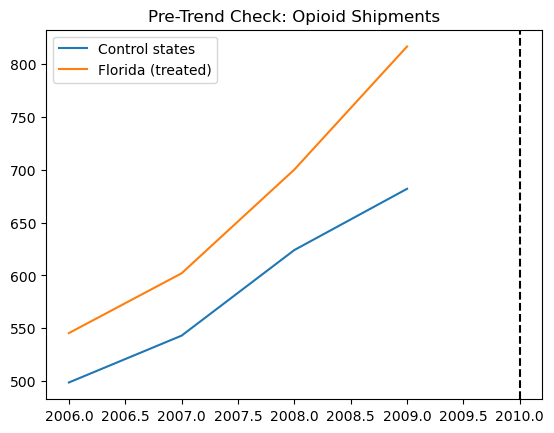

In [255]:
pre_pres = opioids_states_pres[opioids_states_pres["year"] < 2010]

mean_trends = (
    pre_pres.groupby(["policy_state", "year"])["prescriptions_per_1000"]
    .mean()
    .reset_index()
)

for group, d in mean_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    plt.plot(d["year"], d["prescriptions_per_1000"], label=label)

plt.axvline(2010, color="black", linestyle="--")
plt.legend()
plt.title("Pre-Trend Check: Opioid Shipments")
plt.show()

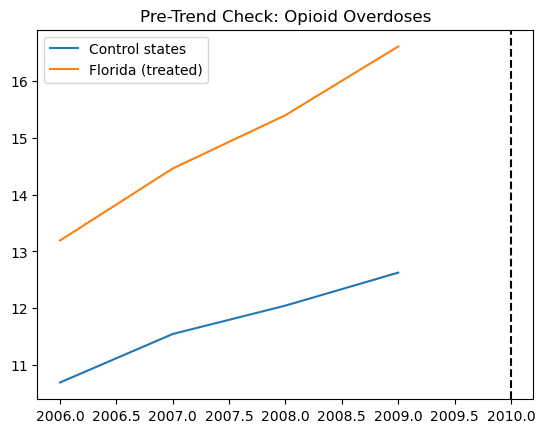

In [256]:
pre_od = opioids_states_od[opioids_states_od["year"] < 2010]

mean_trends = (
    pre_od.groupby(["policy_state", "year"])["overdose_per_100k"].mean().reset_index()
)

for group, d in mean_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    plt.plot(d["year"], d["overdose_per_100k"], label=label)

plt.axvline(2010, color="black", linestyle="--")
plt.legend()
plt.title("Pre-Trend Check: Opioid Overdoses")
plt.show()

### Pre-Post: Florida

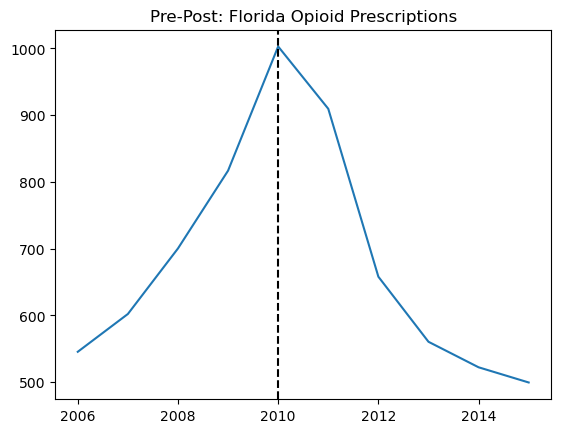

In [257]:
fl = opioids_states_pres[opioids_states_pres["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["prescriptions_per_1000"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Prescriptions")
plt.show()

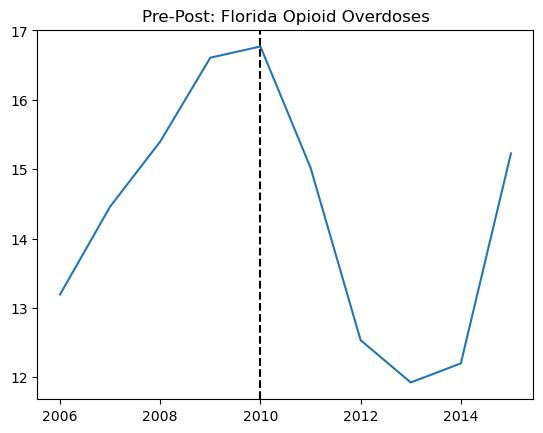

In [258]:
fl = opioids_states_od[opioids_states_od["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["overdose_per_100k"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Overdoses")
plt.show()

### Difference-in-Difference

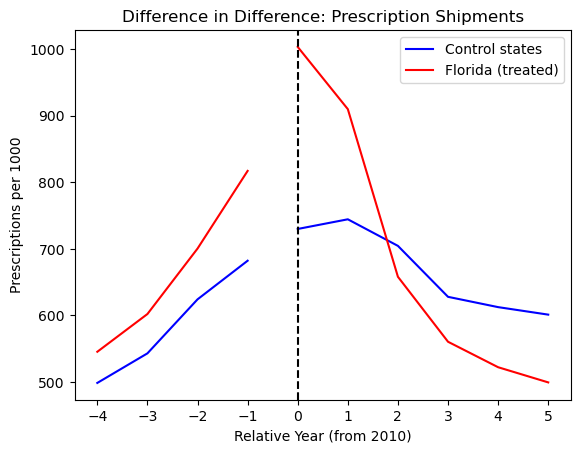

In [259]:
colors = ["blue", "red"]

post_pres = opioids_states_pres[opioids_states_pres["year"] >= 2010]

pre_prescription_trends = (
    pre_pres.groupby(["policy_state", "relative_year"])["prescriptions_per_1000"]
    .mean()
    .reset_index()
)

post_prescription_trends = (
    post_pres.groupby(["policy_state", "relative_year"])["prescriptions_per_1000"]
    .mean()
    .reset_index()
)

fig_pres, ax_pres = plt.subplots()

# part of the graph before 2010
for group, d in pre_prescription_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    ax_pres.plot(
        d["relative_year"],
        d["prescriptions_per_1000"],
        label=label,
        color=colors[group],
    )

# part of graph after 2010
for group, d in post_prescription_trends.groupby("policy_state"):
    ax_pres.plot(
        d["relative_year"],
        d["prescriptions_per_1000"],
        color=colors[group],
    )

ax_pres.axvline(0, color="black", linestyle="--")
ax_pres.set(
    title="Difference in Difference: Prescription Shipments",
    xlabel="Relative Year (from 2010)",
    ylabel="Prescriptions per 1000",
    xticks=sorted(opioids_states_pres["relative_year"].unique()),
)
ax_pres.legend()
plt.show()

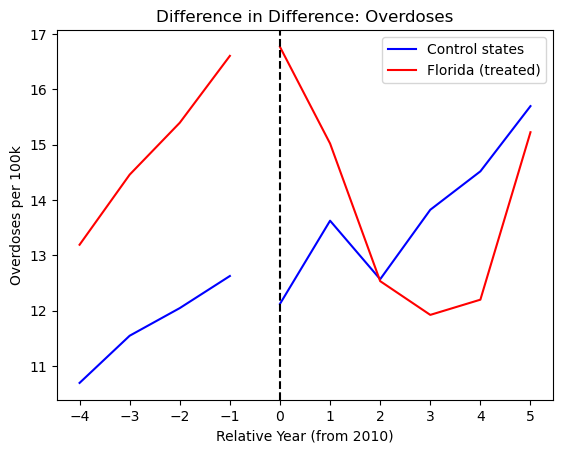

In [260]:
post_od = opioids_states_od[opioids_states_od["year"] >= 2010]

pre_overdose_trends = (
    pre_od.groupby(["policy_state", "relative_year"])["overdose_per_100k"]
    .mean()
    .reset_index()
)

post_overdose_trends = (
    post_od.groupby(["policy_state", "relative_year"])["overdose_per_100k"]
    .mean()
    .reset_index()
)

fig_post, ax_post = plt.subplots()

# part of the graph before 2010
for group, d in pre_overdose_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    ax_post.plot(
        d["relative_year"],
        d["overdose_per_100k"],
        label=label,
        color=colors[group],
    )

# part of the graph after 2010
for group, d in post_overdose_trends.groupby("policy_state"):
    ax_post.plot(
        d["relative_year"],
        d["overdose_per_100k"],
        color=colors[group],
    )

ax_post.axvline(0, color="black", linestyle="--")
ax_post.set(
    title="Difference in Difference: Overdoses",
    xlabel="Relative Year (from 2010)",
    ylabel="Overdoses per 100k",
    xticks=sorted(opioids_states_pres["relative_year"].unique()),
)
ax_post.legend()
plt.show()